## Business Case: Based on given features(x),Predict the type of Skin Disease(y) a patient can have.

In [1]:
#Task 1:-Prepare a complete data analysis report on the given data.

#Task 2:-Create a predictive model  using machine learning techniques to predict the various classes of skin disease. 

#Task3:-Suggestions to the Doctors to identify the skin diseases of the patient at the earliest.


In [2]:
## For this analysis first install and import the important libraries

In [3]:
## Import of required libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler,StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [6]:
#Read data
data=pd.read_csv('Downloads/Skin-Disorder.csv')

In [7]:
data #Load data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [8]:
## data contains information of 366 patient with 35 features.
## class column is target variable contains 1 to 6 classes of skin diseases. 
## 12 clinically test features and 22 histopathologocal test features.In these columns data encoded in form of degree of 0 to 3.
## 0:feature was not present, 3: the largest amount of possibility of disease, 1 and 2:relative intermediate values.
## family history 1 indicates patient have some family background for disease; otherwise 0.

# Domain Analysis
### **What is Skin Disorder?**

#### A Skin disorder is a group of symptoms that disrupts your normal body functions but does not have a known cause.
### <br> **There are many symptoms that can conclude a person can have a skin disorder.**
*  Erythema- Redness of Skin.
*  Scaling-  Scaling skin is the loss of the outer layer of the epidermis in large, scale-like flakes.
*  Definite borders- Skin lesion (i.e area of skin that are different from the skin around them)should have definite borders.
*  Itching
*  Koebner phenomenon- The appearance of new skin lesions on previously unaffected skin secondary to trauma.
*  Polygonal-Papules- Papules and polygonal plaques are shiny, flat-topped, and firm on palpation.
*  Follicular Papules- The follicular papules are small rough bumps that appear in round or oval patches, which extend and spread rapidly over a few                           days to affect large areas of skin.
*  Oral Mucosal Involvement- The oral mucosa is the “skin” inside of the mouth, including cheeks and lips, can be the reason of skin disorder.
*  Knee-Elbow-Scalp involment- Psoriasis is common on your: Scalp, Elbows and knees. Psoriasis is a chronic (long-lasting) disease in which the immune     system becomes overactive, causing skin cells to multiply too quickly.Patches of skin become scaly and inflamed, most often on the scalp, elbows, or    knees are affected.
*  Family history- Some skin conditions have a genetic basis; examples: Atopic eczema, psoriasis, ichthyosis and keratoderma.
*  Melanin incontinence-Characterised by spillage of melanin(a dark brown to black pigment occurring in the hair, skin, and iris of the eye in people      and animals. It is responsible for tanning of skin exposed to sunlight) from the basal keratinocytes into the underlying connective tissue of the       lips.
*  Eosinophils in the infiltrate-It is infilteration of Eosinophils that are a type of white blood cell that protect your body from parasites,             allergens, foreign bacteria and outside organisms.
*  PNL infiltrate- It is infiltration of Pure Neural Laprocya (Laprocy meaning-contagious disease that affects the skin, mucous membranes, and nerves,     causing discoloration and lumps on the skin and, in severe cases, disfigurement and deformities)
*  Fibrosis of the papillary dermis- Thickening or scarring of the tissue of the thin top layer of the dermis(the inner layer of the skin).
*  Exocytosis- It is a process by which a cell transports secretory products through the cytoplasm(the jelly-type liquid that fills the inside of a        cell) to the plasma(liquid component of blood) membrane.
*  Acanthosis- A thickening of the skin,caused by an increased number of specialized squamous cells on the surface.
*  Hyperkeratosis- A condition marked by thickening of the outer layer of the skin, which is made of keratin (a tough, protective protein).
*  Rete ridges- The extension of epidermis into the dermal layer.
*  Clubbing -Clubbing is changes in the areas  under and around the toenails and fingernails that occur with some disorders,
*  Elongation of rete ridges - Increase the length of extension of epidermis into the dermal layer.
*  Thinning of the suprapapillary epidermisa- thinning of the granular layer at the tips of the papillae.
*  Spongiform pustule-Formation of a sponge-like network of cell remnants in the upper epidermal layers, in whose meshes neutrophil leukocytes         are embedded.
*  Focal hypergranulosis-Focal Hypergranulosis means for limited area increased number of cells in the granular layer of the skin.
*  Munro microabcess-Microabscesses composed of pyknotic neutrophils and lying within the parakeratotic areas of the stratum corneum are one of       the  characteristic histological features of early psoriasis vulgris.

*  Disappearance of the Granular layer- Granular layer is an important layer of skin.It contains an epidermal cell called 'Keratinocytes'            which produces keratin(Protein). The disappearance of granular layer may cause the an unhealthy s kin.
* Vacuolisation and damage of basal layer- Basal cells are found at the bottom of the epidermis — the outermost layer of skin. Basal cells produce new skin cells. As new skin cells are produced, they push older cells toward the skin's surface, where the old cells die and are sloughed off. vacuoles(small cavity) and damaged of basal layer will not produce new skin.
* Spongiosis-Spongiosis is mainly intercellular edema (abnormal accumulation of fluid) in the epidermis.
* Sawtooth appearance of retes- Similar saw tooth appearance may be seen in lichen planus(a condition of the skin,hair,nails,mouth and genitals).In the                                 mouth and genital mucosa,lichen planus forms lacy white patches,sometimes with painful sores.
* follicular horn plug- It is conical, keratotic mass(like wart) that arises in areas of chronic(continuing) inflammation.
* Perifollicular- Inflammation of the tissues surrounding the hair follicles.
* Parakeratosis- Parakeratosis refers to incomplete maturation of epidermal keratinocytes, resulting in abnormal retention of nuclei in the stratum                      corneum. It occurs in many diseases of the skin, particularly in psoriasis.
* Inflammatory mononuclear Inflitrate- The ability of mononuclear cells to infiltrate neighbouring tissues and cause inflammation.
* Band-like infiltrate- It is an Affects and obscures the basal epidermis, classically with a band like pattern. Sometimes the infiltrate is patchy.
* Age- Your skin changes with age.It becomes thinner, loses fat, and no longer looks as plump and smooth as it once did.Your veins and bones can be            seen more easily. Scratches, cuts, or bumtake no longer to heal.
*  Class- Here are 6 types of diseases given: Psoriasis, Seboreic Dermatitis, Lichen planus, Pityriasis rosea, Cronic dermatitis, and Pityriasis rubra pilaries.<br><br> **Psoriasis**-Psoriasis is a chronic (long-lasting) disease in which the immune system becomes overactive, causing skin cells to multiply too quickly. Patches of skin become scaly and inflamed, most often on the scalp, elbows, or knees, but other parts of the body can be affected as well. It can begin at any age.
  <br> **Seboreic dermatitis** -A skin condition that causes scaly patches and red skin, mainly on the scalp. It can beging at any age.
  <br> **Lichen planus** -An inflammatory condition of the skin and mucous membranes. It's more common in adults over the age of 40. 
  <br> **Pityriasis rosea**-A skin rash that sometimes begins as a large spot on the chest, abdomen or back, followed by a pattern of smaller lesions.   It can happen at any age but is most common between the ages of 10 and 35. 
  <br> **Cronic dermatitis**-Atopic dermatitis, often referred to as eczema, is a chronic (long-lasting) disease that causes inflammation, redness, and irritation of the skin. It is a common condition that usually begins in childhood; however, anyone can get the disease at any age.
  <br> **Pityriasis rubra pilaries**-Pityriasis rubra pilaris is an uncommon skin condition. It is characterized by reddish-orange scaling patches,  and thick palms and soles.PRP shows a bimodal age distribution, peaking in the first as well as in adult the age of 50 to 60 yrs.
<br><br> By observing the symptoms we can recongnized the skin disease and diagnosise it.  


# Basic checks of data

In [9]:
data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [10]:
data.head(10) #first 10 rows of data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
5,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2
6,2,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,18,5
7,2,2,3,3,3,3,0,2,0,0,...,2,2,3,2,0,0,3,3,57,3
8,2,2,1,0,2,0,0,0,0,0,...,0,0,2,0,0,0,2,0,22,4
9,2,2,1,0,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,30,4


In [11]:
data.tail(10) # Last 10 rows of data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
356,2,2,2,2,2,0,0,0,3,0,...,3,0,0,0,0,0,0,0,75,1
357,2,2,2,0,1,0,0,0,0,1,...,1,0,0,0,0,0,2,0,45,1
358,2,3,2,1,0,0,0,0,2,2,...,2,0,0,0,0,0,3,0,24,1
359,2,2,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,40,2
360,2,2,1,1,0,0,0,0,0,0,...,0,0,3,0,0,0,1,0,25,2
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3
365,3,2,2,0,0,0,0,0,3,3,...,2,0,0,0,0,0,3,0,35,1


In [12]:
data.sample(10) # Random 10 rows of data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
40,1,1,1,0,0,0,1,0,0,0,...,0,0,3,0,0,0,1,0,51,2
296,2,1,1,3,0,0,1,0,0,0,...,0,0,0,0,0,0,2,0,19,5
334,2,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,63,5
102,3,3,3,2,2,0,0,0,2,2,...,2,0,0,0,0,0,3,0,43,1
123,2,3,3,3,3,0,0,0,2,1,...,0,0,0,0,0,0,2,0,30,1
316,2,2,3,2,2,3,0,1,0,0,...,0,3,0,3,0,0,3,2,56,3
161,2,1,1,2,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,61,2
329,2,2,2,2,2,0,0,0,0,2,...,2,0,0,0,0,0,2,0,46,1
219,2,2,1,0,1,0,0,0,0,0,...,0,0,3,0,0,0,2,0,35,4
24,2,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,22,5


In [13]:
data.info() # info() give information like datatype,total rows,total column,null values etc. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [14]:
data.head(pd.set_option('display.max_columns',None))#to diplay all columns from dataset

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50,3


In [15]:
data.describe() #It give statistical information of data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [16]:
# describe() method gives statistical analysis of columns in data.
# The count of each column is 366. that is no null values in data.
# for every column Mean values shows the average value of column.
# Std is average standard deviation of column.
# here we can see min and max value of data.

In [17]:
data.isnull().sum() ##it gives total null values

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [18]:
data.shape ##total rows and columns

(366, 35)

In [19]:
data.columns ## All columns 

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [20]:
## unique() and value_counts() show different types of data and its count respectively.

In [21]:
data.erythema.unique() 

array([2, 3, 1, 0], dtype=int64)

In [22]:
data.erythema.value_counts()

erythema
2    215
3     90
1     57
0      4
Name: count, dtype: int64

In [23]:
data.scaling.unique()

array([2, 3, 1, 0], dtype=int64)

In [24]:
data.scaling.value_counts()

scaling
2    195
1    111
3     52
0      8
Name: count, dtype: int64

In [25]:
data.definite_borders.unique()

array([0, 3, 2, 1], dtype=int64)

In [26]:
data.definite_borders.value_counts()

definite_borders
2    168
1     93
0     59
3     46
Name: count, dtype: int64

In [27]:
data.itching.unique()

array([3, 2, 0, 1], dtype=int64)

In [28]:
data.itching.value_counts()

itching
0    118
2    100
3     76
1     72
Name: count, dtype: int64

In [29]:
data.koebner_phenomenon.unique()

array([0, 1, 2, 3], dtype=int64)

In [30]:
data.koebner_phenomenon.value_counts()

koebner_phenomenon
0    224
1     70
2     54
3     18
Name: count, dtype: int64

In [31]:
data.polygonal_papules.unique()

array([0, 3, 2, 1], dtype=int64)

In [32]:
data.polygonal_papules.value_counts()

polygonal_papules
0    297
2     41
3     27
1      1
Name: count, dtype: int64

In [33]:
data.follicular_papules.unique()

array([0, 3, 1, 2], dtype=int64)

In [34]:
data.follicular_papules.value_counts()

follicular_papules
0    333
2     16
1     11
3      6
Name: count, dtype: int64

In [35]:
data.oral_mucosal_involvement.unique()

array([0, 3, 2, 1], dtype=int64)

In [36]:
data.oral_mucosal_involvement.value_counts()

oral_mucosal_involvement
0    299
2     45
3     13
1      9
Name: count, dtype: int64

In [37]:
data.knee_and_elbow_involvement.unique()

array([1, 0, 3, 2], dtype=int64)

In [38]:
data.knee_and_elbow_involvement.value_counts()

knee_and_elbow_involvement
0    251
2     64
1     28
3     23
Name: count, dtype: int64

In [39]:
data.scalp_involvement.unique()

array([0, 1, 2, 3], dtype=int64)

In [40]:
data.scalp_involvement.value_counts()

scalp_involvement
0    264
2     56
1     30
3     16
Name: count, dtype: int64

In [41]:
data.family_history.unique()

array([0, 1], dtype=int64)

In [42]:
data.family_history.value_counts()

family_history
0    320
1     46
Name: count, dtype: int64

In [43]:
data.melanin_incontinence.unique()

array([0, 1, 2, 3], dtype=int64)

In [44]:
data.melanin_incontinence.value_counts()

melanin_incontinence
0    296
2     46
3     16
1      8
Name: count, dtype: int64

In [45]:
data.eosinophils_in_the_infiltrate.unique()

array([0, 2, 1], dtype=int64)

In [46]:
data.eosinophils_in_the_infiltrate.value_counts()

eosinophils_in_the_infiltrate
0    324
1     33
2      9
Name: count, dtype: int64

In [47]:
data.PNL_infiltrate.unique()

array([0, 1, 3, 2], dtype=int64)

In [48]:
data.PNL_infiltrate.value_counts()

PNL_infiltrate
0    235
1     69
2     55
3      7
Name: count, dtype: int64

In [49]:
data.fibrosis_of_the_papillary_dermis.unique()

array([0, 3, 1, 2], dtype=int64)

In [50]:
data.fibrosis_of_the_papillary_dermis.value_counts()

fibrosis_of_the_papillary_dermis
0    312
3     23
2     23
1      8
Name: count, dtype: int64

In [51]:
data.exocytosis.unique()

array([3, 1, 0, 2], dtype=int64)

In [52]:
data.exocytosis.value_counts()

exocytosis
2    129
0    118
3     62
1     57
Name: count, dtype: int64

In [53]:
data.acanthosis.unique()

array([2, 3, 1, 0], dtype=int64)

In [54]:
data.acanthosis.value_counts()

acanthosis
2    210
3     75
1     71
0     10
Name: count, dtype: int64

In [55]:
data.hyperkeratosis.unique()

array([0, 2, 1, 3], dtype=int64)

In [56]:
data.hyperkeratosis.value_counts()

hyperkeratosis
0    227
1     90
2     44
3      5
Name: count, dtype: int64

In [57]:
data.parakeratosis.unique()

array([0, 2, 3, 1], dtype=int64)

In [58]:
data.parakeratosis.value_counts()

parakeratosis
2    132
1    118
0     86
3     30
Name: count, dtype: int64

In [59]:
data.clubbing_of_the_rete_ridges.unique()

array([0, 2, 1, 3], dtype=int64)

In [60]:
data.clubbing_of_the_rete_ridges.value_counts()

clubbing_of_the_rete_ridges
0    252
2     61
3     34
1     19
Name: count, dtype: int64

In [61]:
data.elongation_of_the_rete_ridges.unique()

array([0, 2, 3, 1], dtype=int64)

In [62]:
data.elongation_of_the_rete_ridges.value_counts()

elongation_of_the_rete_ridges
0    198
2     95
3     50
1     23
Name: count, dtype: int64

In [63]:
data.thinning_of_the_suprapapillary_epidermis.unique()

array([0, 2, 3, 1], dtype=int64)

In [64]:
data.thinning_of_the_suprapapillary_epidermis.value_counts()

thinning_of_the_suprapapillary_epidermis
0    256
2     60
3     31
1     19
Name: count, dtype: int64

In [65]:
data.spongiform_pustule.unique()

array([0, 2, 1, 3], dtype=int64)

In [66]:
data.spongiform_pustule.value_counts()

spongiform_pustule
0    296
1     38
2     26
3      6
Name: count, dtype: int64

In [67]:
data.munro_microabcess.unique()

array([0, 1, 2, 3], dtype=int64)

In [68]:
data.munro_microabcess.value_counts()

munro_microabcess
0    286
1     37
2     33
3     10
Name: count, dtype: int64

In [69]:
data.focal_hypergranulosis.unique()

array([0, 2, 3, 1], dtype=int64)

In [70]:
data.focal_hypergranulosis.value_counts()

focal_hypergranulosis
0    295
2     43
3     15
1     13
Name: count, dtype: int64

In [71]:
data.disappearance_of_the_granular_layer.unique()

array([0, 3, 2, 1], dtype=int64)

In [72]:
data.disappearance_of_the_granular_layer.value_counts()

disappearance_of_the_granular_layer
0    273
2     49
1     30
3     14
Name: count, dtype: int64

In [73]:
data.vacuolisation_and_damage_of_basal_layer.unique()

array([0, 2, 3, 1], dtype=int64)

In [74]:
data.vacuolisation_and_damage_of_basal_layer.value_counts()

vacuolisation_and_damage_of_basal_layer
0    294
2     43
3     26
1      3
Name: count, dtype: int64

In [75]:
data.spongiosis.unique()

array([3, 0, 2, 1], dtype=int64)

In [76]:
data.spongiosis.value_counts()

spongiosis
0    199
2     96
3     43
1     28
Name: count, dtype: int64

In [77]:
data['saw-tooth_appearance_of_retes'].unique()

array([0, 2, 3, 1], dtype=int64)

In [78]:
data['saw-tooth_appearance_of_retes'].value_counts()

saw-tooth_appearance_of_retes
0    294
2     40
3     27
1      5
Name: count, dtype: int64

In [79]:
data.follicular_horn_plug.unique()

array([0, 1, 2, 3], dtype=int64)

In [80]:
data.follicular_horn_plug.value_counts()

follicular_horn_plug
0    344
1     10
2      8
3      4
Name: count, dtype: int64

In [81]:
data.perifollicular_parakeratosis.unique()

array([0, 2, 1, 3], dtype=int64)

In [82]:
data.perifollicular_parakeratosis.value_counts()

perifollicular_parakeratosis
0    345
2     13
1      4
3      4
Name: count, dtype: int64

In [83]:
data.inflammatory_monoluclear_inflitrate.unique()

array([1, 2, 3, 0], dtype=int64)

In [84]:
data.inflammatory_monoluclear_inflitrate.value_counts()

inflammatory_monoluclear_inflitrate
2    206
1     85
3     62
0     13
Name: count, dtype: int64

In [85]:
data['band-like_infiltrate'].unique()

array([0, 3, 1, 2], dtype=int64)

In [86]:
data['band-like_infiltrate'].value_counts()

band-like_infiltrate
0    289
3     52
2     22
1      3
Name: count, dtype: int64

In [87]:
data.Age.unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '?', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [88]:
# here we can see missing value i.e '?' present in Age column.

In [89]:
data.Age.value_counts()

Age
40    17
50    17
36    16
27    16
22    15
      ..
58     1
49     1
63     1
68     1
75     1
Name: count, Length: 61, dtype: int64

In [90]:
data.replace('?', data['Age'].mode()[0], inplace=True) ## handled missing values replacing by Mode values.


In [91]:
data.Age.unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '15', '46', '62', '35', '48', '12', '52', '60', '32',
       '19', '29', '25', '36', '13', '27', '31', '28', '64', '39', '47',
       '16', '0', '7', '70', '37', '61', '67', '56', '53', '24', '58',
       '49', '63', '68', '9', '75'], dtype=object)

In [92]:
data['Age'] = data['Age'].astype(str).astype(int) ## conversion of object datatype into int datatype.

In [93]:
data.Age.value_counts() ## checking weather conversion is done or not.

Age
40    25
50    17
27    16
36    16
22    15
55    14
25    14
35    14
30    13
33    12
60    11
52    11
42    10
18     9
20     8
34     8
10     7
8      7
62     7
45     7
51     7
46     6
47     6
32     6
19     6
28     5
44     5
56     5
17     5
48     5
16     5
70     4
7      4
43     4
41     4
26     3
21     3
29     3
38     3
23     3
12     3
13     2
65     2
9      2
24     2
53     2
15     2
61     2
37     2
57     2
39     2
31     2
67     1
0      1
64     1
58     1
49     1
63     1
68     1
75     1
Name: count, dtype: int64

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   erythema                                  366 non-null    int64
 1   scaling                                   366 non-null    int64
 2   definite_borders                          366 non-null    int64
 3   itching                                   366 non-null    int64
 4   koebner_phenomenon                        366 non-null    int64
 5   polygonal_papules                         366 non-null    int64
 6   follicular_papules                        366 non-null    int64
 7   oral_mucosal_involvement                  366 non-null    int64
 8   knee_and_elbow_involvement                366 non-null    int64
 9   scalp_involvement                         366 non-null    int64
 10  family_history                            366 non-null    int6

In [95]:
data['class'].unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

In [96]:
data['class'].value_counts()

class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64

## EDA- Exploratory Data  Analysis

### Univariate analysis

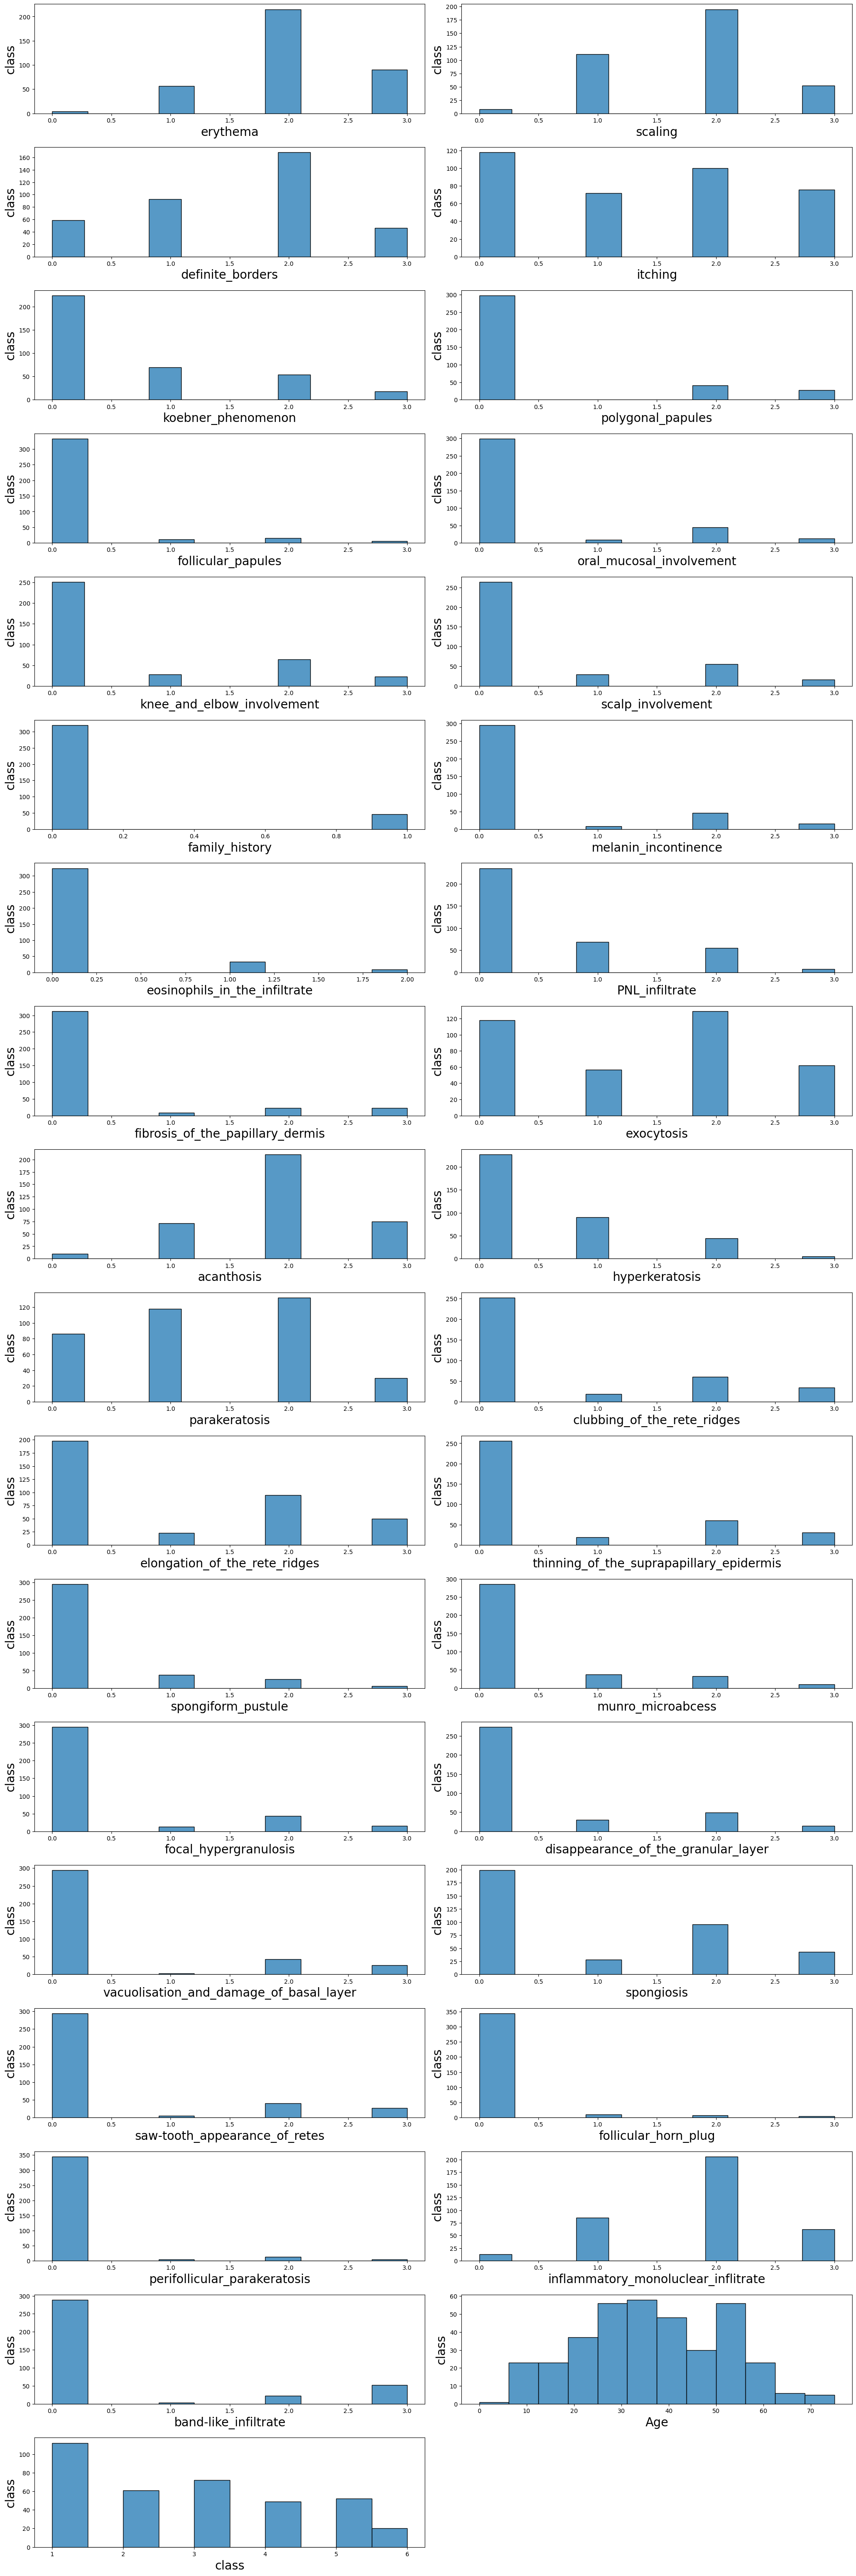

In [97]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=35:
        ax=plt.subplot(18,2,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('class',fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Bivariate analysis

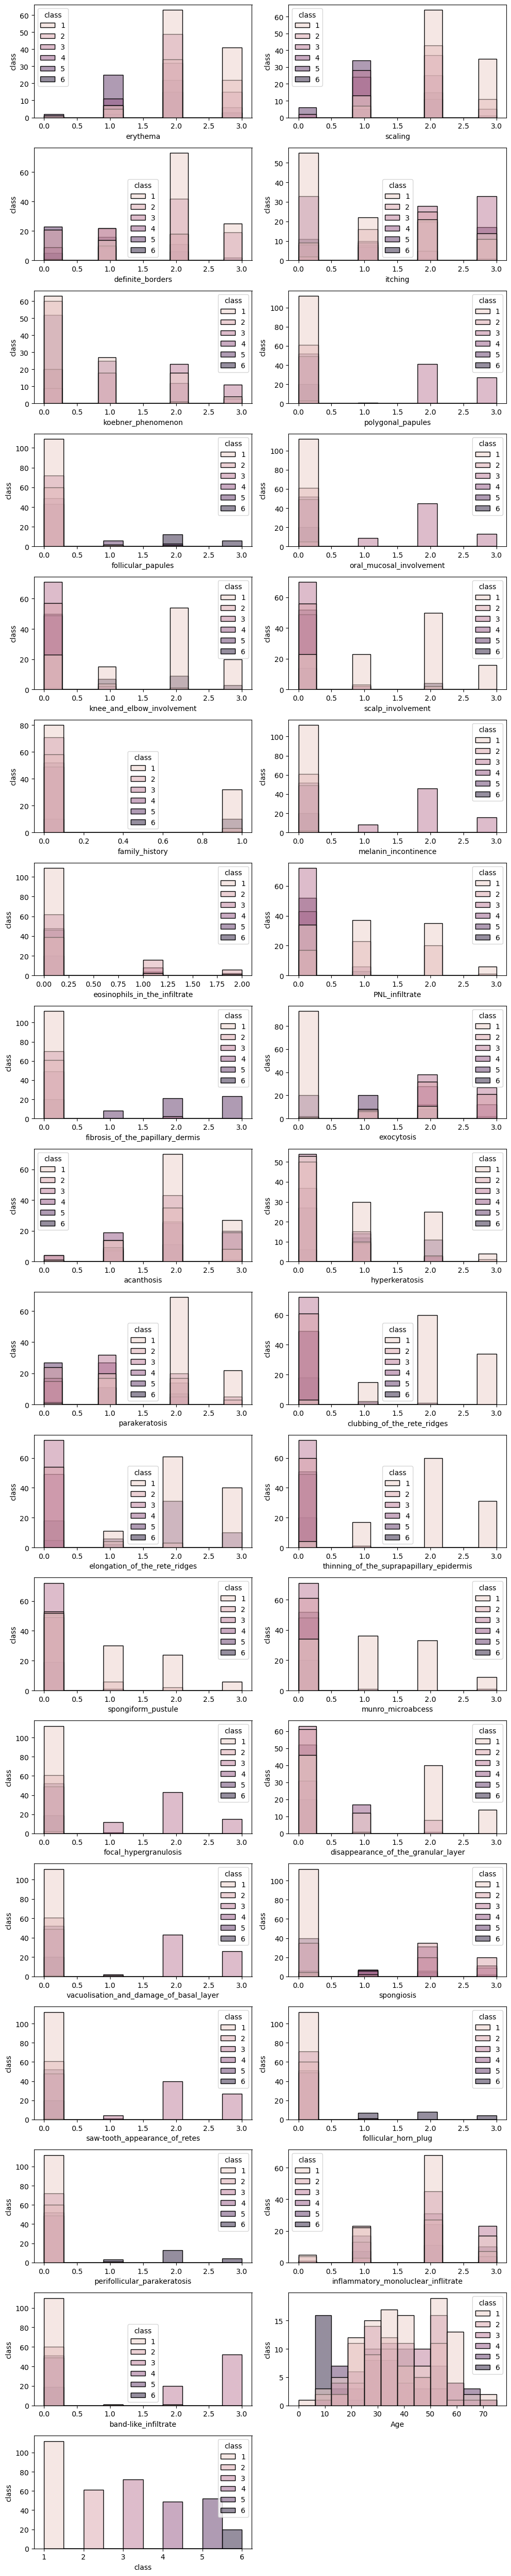

In [98]:
plt.figure(figsize=(10,50),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=36:
        ax=plt.subplot(18,2,plotnumber)
        sns.histplot(x=data[column],hue=data['class'])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('class',fontsize=10)
    plotnumber+=1
plt.tight_layout()

### outliers checking

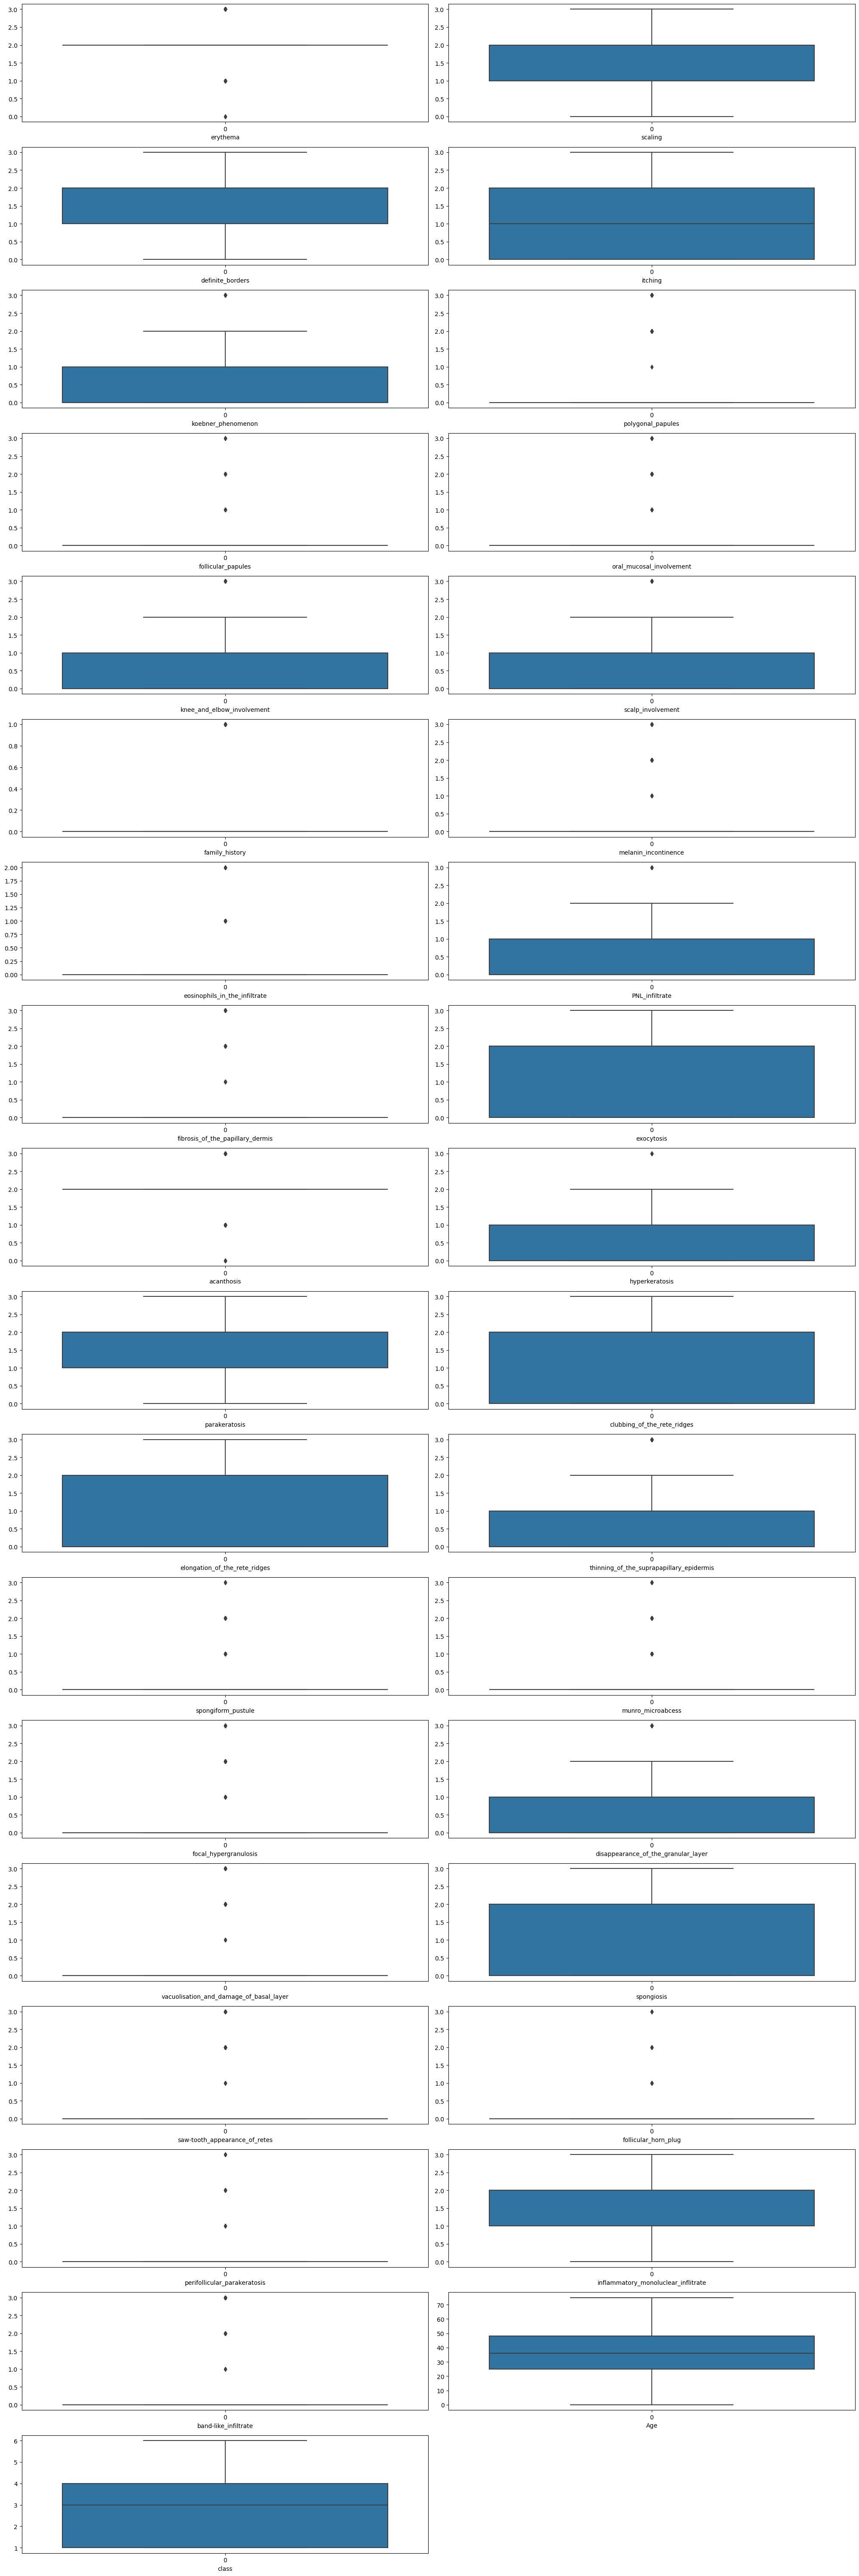

In [99]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=35:
        ax=plt.subplot(18,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
    
    
    plotnumber+=1
plt.tight_layout()

In [100]:
# Almost 70% patient of erythema present in dataset.
# More than 80% patient's showing scaling.
# Nearby 71% showing definite borders in their data.
# only 32% have no itching.
# 60 to 62% no koebner phenomenon.
# Almost 81% have no poly papules.
# More than 90% have no follicular papules.
# Around 81% no oral mucosal involvement.
# 68 to 72% of patients have no involvement of knee,elbow and scalp.
# 87% had no family history at all.
# only nearby 20% showing melanin incontinence.
# Around 85 to 88% have no eosinophils infiltrate and no fobrosis of papillary dermis.
# 64% no PNL infiltrate. 
# 67% gives exocytosis.
# Almost 3/4 patients giving acanthosis.
# Nearby 75% no hyperkeratosis.
# around 70% shows parakeratosis.
# most of the patients had no clubbing rete ridge.
# only 54% showing elongation of rete ridges.
# 70% to 80% have no thinning of suprapapilary epidermise,no spongiform pustule, no munro microabcess,no focalhypergranular,
#no disappearance of garnular and no vacuolisation and damage of basal layer.
# only 45% have spongiosis.
# nearby 78-80% have not symtoms of sawtooth appearance and band like infiltrate.
# almost all don't have symptoms of follicular horn plig and perifolicular parakaratosis.
# only 56% have inflamatory monoluclear infiltrate.
#Percentage of outliers of every column calculated by IQR. And it is less than 5%.
#so we will consider outliers as part of our data. we will not handle the outliers.

<Axes: >

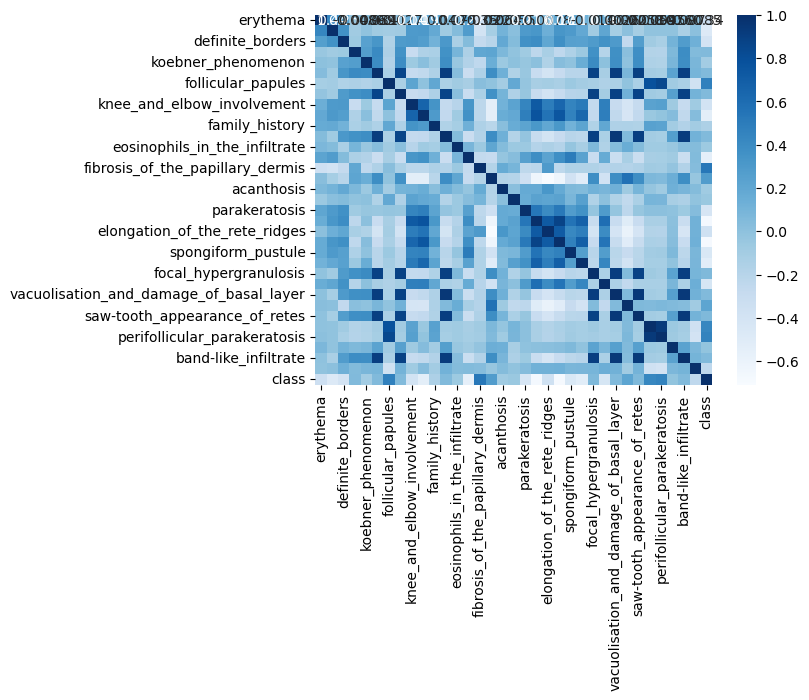

In [101]:
sns.heatmap(data.corr(),annot=True,cmap='Blues') # heat map shows the correlation between two variables.

## Feature selection

In [102]:
# we will remove that indepandant features which are strongly corretated with eachother.

In [103]:
data.drop('polygonal_papules',axis=1,inplace=True)

In [104]:
data.drop('melanin_incontinence',axis=1,inplace=True)

In [105]:
data.drop('vacuolisation_and_damage_of_basal_layer',axis=1,inplace=True)
data.drop('saw-tooth_appearance_of_retes',axis=1,inplace=True)
data.drop('perifollicular_parakeratosis',axis=1,inplace=True)
data.drop('band-like_infiltrate',axis=1,inplace=True)
data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,spongiosis,follicular_horn_plug,inflammatory_monoluclear_inflitrate,Age,class
0,2,2,0,3,0,0,0,1,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,3,0,1,55,2
1,3,3,3,2,1,0,0,1,1,1,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,1,8,1
2,2,1,2,3,1,0,3,0,0,0,0,0,0,1,2,0,2,0,0,0,0,0,2,0,3,0,2,26,3
3,2,2,2,0,0,0,0,3,2,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,3,40,1
4,2,3,2,2,2,0,2,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,2,2,2,0,2,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,2,25,4
362,3,2,1,0,1,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,1,0,2,36,4
363,3,2,2,2,3,0,2,0,0,0,2,0,0,3,3,0,0,0,0,0,0,0,3,0,0,0,2,28,3
364,2,1,3,1,2,0,2,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,3,0,0,0,2,50,3


In [106]:
# seperation of dependant variable(y=class) from independant variables(x)

In [107]:
x=data.drop('class',axis=1)
y= data['class']


In [108]:
data['class'].value_counts()

class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64

# Data Balancing 

In [109]:
# apply the smoting to balanced the data.

from collections import Counter 
from imblearn.over_sampling import SMOTE
smote=SMOTE()
print(Counter(y))
x_smt,y_smt=smote.fit_resample(x,y)
print(Counter(y_smt))

Counter({1: 112, 3: 72, 2: 61, 5: 52, 4: 49, 6: 20})
Counter({2: 112, 1: 112, 3: 112, 5: 112, 4: 112, 6: 112})


# Model creation

## Prepare training and testing data

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_smt,y_smt,test_size=0.2,random_state=30)

In [111]:
x_train

,erythema,scaling,definite_borders,itching,koebner_phenomenon,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,spongiosis,follicular_horn_plug,inflammatory_monoluclear_inflitrate,Age
220,3,1,1,0,1,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,2,0,3,30
448,1,1,2,2,1,0,2,0,0,0,0,0,0,2,1,0,2,0,0,0,0,0,2,0,0,0,2,48
482,2,1,1,0,1,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,2,0,1,35
584,1,1,1,0,0,3,0,2,0,1,0,0,0,2,1,1,1,0,0,0,0,0,0,0,1,2,2,7
492,2,2,1,0,1,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,2,0,2,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,2,1,2,2,0,0,0,0,1,0,1,0,0,2,3,1,2,0,0,0,0,0,1,0,2,0,2,49
145,2,2,3,3,1,0,2,0,0,0,0,0,0,3,3,0,2,0,0,0,0,0,3,0,1,0,2,40
140,2,2,1,2,2,0,0,0,0,0,0,1,0,1,2,0,1,0,0,0,0,0,0,0,2,0,2,20
500,1,1,0,1,1,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,2,0,2,57


In [112]:
y_train

220    4
448    3
482    4
584    6
492    4
      ..
430    3
145    3
140    2
500    4
421    3
Name: class, Length: 537, dtype: int64

In [113]:
x_train.shape

(537, 28)

In [114]:
x_test.shape

(135, 28)

# Model- Random Forest 

In [115]:
# accurecy check for traning data

In [116]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

random_forest = RandomForestClassifier(n_estimators=100,random_state=40)
random_forest.fit(x_train,y_train)



RandomForestClassifier(random_state=40)

In [117]:
y_train_pred=random_forest.predict(x_train)

accuracy= accuracy_score(y_train,y_train_pred)
print('accuracy score : ',accuracy)

f1_score= f1_score(y_train,y_train_pred, average='weighted')
print('f1_score : ',f1_score)

accuracy score :  1.0
f1_score :  1.0


In [118]:
# Accuracy check for testing data

In [119]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

random_forest = RandomForestClassifier(n_estimators=100,random_state=40)
random_forest.fit(x_test,y_test)

y_test_pred = random_forest.predict(x_test)

accuracy = accuracy_score(y_test,y_test_pred)
print('accuracy score : ',accuracy)

f1_score = f1_score(y_test,y_test_pred, average='weighted')
print('f1_score : ',f1_score)

accuracy score :  1.0
f1_score :  1.0


# Model- Decision Tree

In [120]:
# accuracy check for training data

In [121]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree

dt=DecisionTreeClassifier()#object creation for decision tree  

dt.fit(x_train,y_train)#training the model



DecisionTreeClassifier()

In [122]:
y_train_pred=dt.predict(x_train)#predicting training data to check training performance 
y_train_pred

array([4, 3, 4, 6, 4, 6, 5, 3, 2, 3, 4, 1, 5, 3, 1, 4, 5, 2, 1, 2, 2, 5,
       3, 1, 2, 2, 6, 3, 4, 3, 3, 5, 1, 4, 2, 2, 3, 2, 3, 3, 6, 1, 2, 3,
       6, 5, 4, 4, 5, 1, 2, 6, 6, 1, 1, 2, 6, 4, 3, 1, 2, 6, 6, 3, 1, 6,
       5, 1, 2, 6, 4, 1, 3, 4, 1, 6, 5, 1, 1, 4, 1, 4, 1, 1, 5, 6, 3, 2,
       6, 6, 3, 3, 1, 6, 3, 3, 3, 4, 4, 4, 5, 4, 6, 5, 6, 1, 4, 2, 3, 1,
       5, 5, 4, 1, 5, 5, 3, 1, 6, 6, 4, 5, 5, 6, 4, 2, 6, 1, 5, 2, 5, 1,
       2, 6, 6, 5, 1, 5, 4, 6, 1, 2, 4, 5, 6, 5, 6, 2, 5, 5, 3, 2, 4, 6,
       6, 5, 3, 2, 1, 4, 3, 2, 5, 5, 1, 6, 1, 5, 4, 4, 5, 2, 5, 2, 2, 5,
       4, 3, 6, 1, 2, 2, 3, 1, 1, 4, 5, 4, 2, 3, 6, 3, 5, 6, 4, 5, 2, 4,
       3, 2, 1, 1, 3, 5, 6, 2, 3, 2, 1, 4, 1, 6, 4, 1, 3, 5, 1, 2, 6, 6,
       6, 4, 2, 3, 3, 4, 5, 3, 6, 3, 6, 1, 4, 1, 2, 1, 5, 5, 2, 3, 1, 4,
       2, 4, 4, 3, 3, 2, 4, 5, 1, 2, 1, 6, 2, 2, 3, 4, 2, 6, 3, 1, 5, 6,
       4, 2, 6, 4, 6, 1, 3, 4, 6, 4, 1, 6, 1, 1, 2, 6, 4, 1, 6, 3, 2, 5,
       1, 6, 6, 2, 3, 6, 2, 5, 6, 4, 2, 3, 6, 3, 4,

In [123]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix#importing mertics to check model performance
##Training score
y_train_pred=dt.predict(x_train)#passing X_train to predict Y_train
acc_train=accuracy_score(y_train,y_train_pred)#checking accuracy
acc_train

1.0

In [124]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        88
           2       1.00      1.00      1.00        89
           3       1.00      1.00      1.00        92
           4       1.00      1.00      1.00        89
           5       1.00      1.00      1.00        92
           6       1.00      1.00      1.00        87

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



In [125]:
pd.crosstab(y_train,y_train_pred)#it will show you confusion matrix

col_0,1,2,3,4,5,6
class,,,,,,
1,88,0,0,0,0,0
2,0,89,0,0,0,0
3,0,0,92,0,0,0
4,0,0,0,89,0,0
5,0,0,0,0,92,0
6,0,0,0,0,0,87


In [126]:
# accurecy check for testing data

In [127]:
accuracy=accuracy_score(y_test,y_test_pred)#testing accuracy 
accuracy

1.0

In [128]:
f1=f1_score(y_test,y_test_pred, average='macro')#f1 score
f1

1.0

In [129]:
print(classification_report(y_test,y_test_pred))# for  testing

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        25

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



# Model-Support Vector Machine  

In [130]:
from sklearn.svm import SVC

svclassifier = SVC() ## base model with default parameters

svclassifier.fit(x_train, y_train)

SVC()

In [131]:
# Predict output for X_train
y_train_pred=svclassifier.predict(x_train)

In [132]:
y_train_pred

array([4, 3, 4, 6, 4, 6, 5, 3, 2, 3, 4, 1, 5, 3, 1, 4, 5, 2, 1, 6, 2, 5,
       3, 1, 2, 2, 6, 3, 4, 3, 3, 5, 1, 4, 2, 4, 3, 2, 3, 3, 6, 1, 4, 3,
       6, 5, 4, 4, 5, 1, 2, 6, 6, 1, 1, 4, 6, 4, 3, 1, 4, 6, 6, 3, 1, 6,
       5, 1, 2, 6, 4, 6, 3, 4, 1, 6, 5, 1, 1, 4, 1, 4, 1, 1, 5, 6, 3, 4,
       6, 6, 2, 3, 6, 6, 3, 3, 4, 4, 4, 4, 5, 4, 6, 5, 6, 1, 4, 2, 3, 1,
       5, 5, 2, 1, 5, 5, 3, 1, 6, 6, 4, 5, 5, 6, 4, 2, 6, 1, 5, 4, 5, 1,
       2, 6, 6, 5, 1, 5, 4, 6, 1, 4, 2, 5, 6, 5, 6, 2, 5, 5, 3, 4, 4, 6,
       6, 5, 3, 2, 1, 4, 4, 4, 6, 5, 1, 2, 1, 5, 4, 4, 5, 2, 5, 4, 4, 5,
       4, 3, 6, 1, 4, 2, 3, 1, 1, 2, 5, 4, 2, 3, 6, 3, 5, 6, 4, 5, 2, 4,
       3, 2, 1, 1, 3, 5, 6, 2, 3, 4, 1, 2, 1, 6, 4, 1, 3, 5, 1, 2, 6, 6,
       6, 4, 2, 3, 3, 4, 5, 3, 2, 3, 6, 1, 2, 1, 2, 1, 5, 4, 4, 3, 1, 4,
       2, 4, 4, 3, 3, 4, 4, 5, 1, 4, 1, 6, 2, 2, 3, 4, 2, 6, 3, 1, 5, 6,
       4, 4, 6, 4, 6, 1, 3, 4, 6, 2, 1, 6, 1, 1, 4, 6, 2, 1, 6, 2, 2, 5,
       6, 6, 6, 2, 3, 6, 4, 5, 6, 4, 2, 3, 6, 3, 4,

In [133]:
y_train

220    4
448    3
482    4
584    6
492    4
      ..
430    3
145    3
140    2
500    4
421    3
Name: class, Length: 537, dtype: int64

In [134]:
# accuracy check for training data
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_train,y_train_pred)
acc

0.8752327746741154

In [135]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.98        88
           2       0.77      0.56      0.65        89
           3       0.98      0.95      0.96        92
           4       0.65      0.85      0.74        89
           5       1.00      0.96      0.98        92
           6       0.90      0.98      0.94        87

    accuracy                           0.88       537
   macro avg       0.88      0.87      0.87       537
weighted avg       0.88      0.88      0.87       537



In [136]:
cm1=pd.crosstab(y_train,y_train_pred)
cm1

col_0,1,2,3,4,5,6
class,,,,,,
1,84,0,0,0,0,4
2,0,50,1,36,0,2
3,0,2,87,3,0,0
4,0,11,1,76,0,1
5,0,0,0,2,88,2
6,0,2,0,0,0,85


In [137]:
precision_score(y_train,y_train_pred,average='weighted')

0.8843134102590775

In [138]:
f1=f1_score(y_train,y_train_pred,average='weighted')
f1

0.8743498152049805

In [139]:
#prdict output for x test
y_test_pred=svclassifier.predict(x_test)

In [140]:
y_test_pred

array([6, 2, 5, 3, 6, 4, 5, 5, 2, 5, 3, 2, 2, 2, 1, 4, 1, 2, 5, 3, 6, 6,
       6, 6, 4, 5, 4, 6, 1, 4, 3, 6, 1, 1, 3, 5, 2, 3, 6, 4, 4, 5, 5, 3,
       4, 4, 1, 4, 4, 6, 5, 6, 2, 4, 2, 1, 6, 1, 2, 4, 1, 6, 1, 4, 5, 6,
       6, 2, 4, 2, 4, 6, 1, 3, 6, 5, 3, 1, 4, 1, 6, 2, 6, 4, 2, 3, 4, 2,
       5, 6, 6, 4, 3, 6, 5, 3, 1, 1, 1, 2, 2, 4, 4, 4, 4, 3, 4, 5, 2, 3,
       3, 3, 3, 1, 5, 5, 1, 4, 6, 5, 2, 2, 4, 1, 1, 6, 1, 1, 4, 5, 5, 3,
       2, 6, 1], dtype=int64)

In [141]:
y_test

580    6
313    3
338    5
439    3
630    6
      ..
333    5
157    3
514    4
344    6
152    1
Name: class, Length: 135, dtype: int64

In [142]:
# accuracy check for testing data
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_test_pred)
acc

0.837037037037037

In [143]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        24
           2       0.57      0.52      0.55        23
           3       1.00      0.90      0.95        20
           4       0.57      0.70      0.63        23
           5       1.00      1.00      1.00        20
           6       0.96      0.96      0.96        25

    accuracy                           0.84       135
   macro avg       0.85      0.84      0.84       135
weighted avg       0.85      0.84      0.84       135



In [144]:
cm1=pd.crosstab(y_test,y_test_pred)
cm1

col_0,1,2,3,4,5,6
class,,,,,,
1,23,0,0,0,0,1
2,0,12,0,11,0,0
3,0,1,18,1,0,0
4,0,7,0,16,0,0
5,0,0,0,0,20,0
6,0,1,0,0,0,24


In [145]:
precision_score(y_test,y_test_pred,average='weighted')

0.8465608465608465

In [146]:
f1=f1_score(y_test,y_test_pred,average='weighted')
f1

0.8401004238344775

# Model- Naive Bayes

In [147]:
from sklearn.naive_bayes import GaussianNB

In [148]:
gnb = GaussianNB()
gnb_model = gnb.fit(x_train,y_train)
gnb_model

GaussianNB()

In [149]:
y_train_pred = gnb_model.predict(x_train)
y_test_pred = gnb_model.predict(x_test)

In [150]:
# accuracy check for both training and testing data
accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred)

(0.9013035381750466, 0.9037037037037037)

In [151]:
f1_score(y_train,y_train_pred, average='weighted'),f1_score(y_test,y_test_pred, average='weighted')

(0.8906341160362642, 0.8953451654016625)

# Model- MLP

In [152]:
from sklearn.neural_network import MLPClassifier

In [153]:
mlp = MLPClassifier()
mlp_model = mlp.fit(x_train,y_train)
mlp_model

MLPClassifier()

In [154]:
y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)

In [155]:
# accuracy check for both training and testing data
accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred)

(0.9962756052141527, 0.9777777777777777)

In [156]:
f1_score(y_train,y_train_pred, average='weighted'),f1_score(y_test,y_test_pred, average='weighted')

(0.9962751349622857, 0.9777672708169163)

# Model- Logistic Regression

In [157]:
from sklearn.linear_model import LogisticRegression
lr_multi=LogisticRegression()
lr_multi.fit(x_train,y_train)
y_test_pred=lr_multi.predict(x_test)

In [158]:
y_test_pred

array([6, 3, 5, 3, 6, 4, 5, 5, 2, 5, 3, 2, 2, 4, 1, 4, 1, 2, 5, 3, 6, 6,
       6, 6, 4, 5, 2, 6, 1, 2, 3, 6, 1, 1, 3, 5, 2, 3, 6, 4, 4, 5, 5, 3,
       2, 4, 1, 4, 2, 6, 5, 6, 6, 4, 2, 1, 6, 1, 2, 4, 1, 6, 1, 4, 5, 6,
       6, 2, 4, 2, 2, 6, 1, 3, 1, 5, 3, 1, 4, 1, 6, 4, 6, 2, 4, 3, 4, 4,
       5, 6, 6, 2, 3, 6, 5, 3, 1, 1, 1, 2, 4, 4, 4, 4, 2, 3, 2, 5, 2, 3,
       3, 3, 3, 1, 5, 5, 1, 3, 6, 5, 2, 2, 4, 1, 1, 6, 1, 1, 2, 5, 5, 3,
       2, 6, 2], dtype=int64)

In [159]:
y_test

580    6
313    3
338    5
439    3
630    6
      ..
333    5
157    3
514    4
344    6
152    1
Name: class, Length: 135, dtype: int64

In [160]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [161]:
cm=confusion_matrix(y_test,y_test_pred)
cm

array([[23,  1,  0,  0,  0,  0],
       [ 0, 21,  0,  2,  0,  0],
       [ 0,  0, 20,  0,  0,  0],
       [ 0,  3,  0, 20,  0,  0],
       [ 0,  0,  0,  0, 20,  0],
       [ 0,  0,  0,  0,  0, 25]], dtype=int64)

In [162]:
# accuracy check for testing data
accuracy=accuracy_score(y_test, y_test_pred)
print('Accuracy=', accuracy)

Accuracy= 0.9555555555555556


In [163]:
f1=f1_score(y_test,y_test_pred,average='weighted')
print('f1 score=',f1)

f1 score= 0.9559911566412748


In [164]:
# for comparision of all model accuracy score

In [165]:
dfr = pd.DataFrame()
dfr['Model'] = ['Random Forest','Decision tree','SVM','Naive Bayes','MLP','Logistic Regression']
dfr['Accuracy_score'] = [1,1,0.84,0.90,0.97,0.98]
dfr

,Model,Accuracy_score
0,Random Forest,1.00
1,Decision tree,1.00
2,SVM,0.84
3,Naive Bayes,0.90
4,MLP,0.97
5,Logistic Regression,0.98


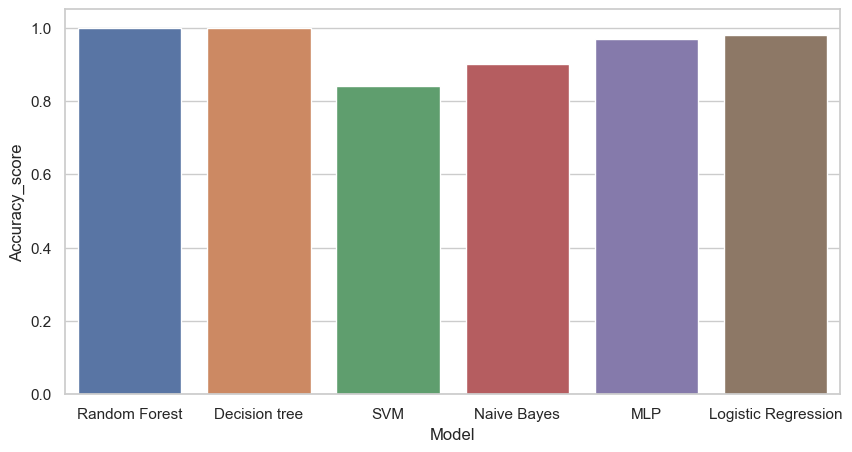

In [166]:
# coparision using graph
plt.figure(figsize=(10,5))
sns.set(style= 'whitegrid')
ax=sns.barplot(x='Model',y='Accuracy_score',data=dfr)

## Conclusion- All models are giving good accuracy. We can use any one of them to predict the various class of skin disease.

### Report on challenges faced:
* Feature Selection: Choosing the right set of features that are relevant to the problem at hand can significantly impact the accuracy of a model.
* Solutions to problems we encountered while working on this project.

### Suggetions to the Doctor: Using Machine learning in dermatology will definately help the Dermatologist to identify the diseases earliest.So the patients can take treatment soon.